# K - Nearest Neighbor Classification

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Read the file - Extract it from the system or file

In [3]:
data = pd.read_csv('D:\\MachineLearningWithPython-main\\MachineLearningWithPython-main\\files\\weather.csv')
data

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes
5,2008-02-06,20.2,27.2,1.6,2.6,8.6,NaN,NaN,W,ENE,...,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,6.2,Yes
6,2008-02-07,18.6,26.3,6.2,5.2,5.2,NaN,NaN,W,S,...,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,27.6,Yes
7,2008-02-08,17.2,22.3,27.6,5.8,2.1,NaN,NaN,S,SE,...,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,12.6,Yes
8,2008-02-09,16.4,20.8,12.6,4.8,3.0,NaN,NaN,SSW,W,...,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,8.8,Yes
9,2008-02-10,14.6,24.2,8.8,4.4,10.1,NaN,NaN,W,SSE,...,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,0.0,No


In [4]:
data.index


RangeIndex(start=0, stop=3337, step=1)

# Create a dataset of your choice (choose the rows & columns)
where dataset is userdefined


In [5]:
dataset = data[['Humidity3pm','Pressure3pm', 'RainTomorrow' ]]
dataset

,Humidity3pm,Pressure3pm,RainTomorrow
0,84.0,1017.4,Yes
1,73.0,1016.4,Yes
2,86.0,1015.6,Yes
3,90.0,1011.8,Yes
4,74.0,1004.8,Yes
5,62.0,998.6,Yes
6,80.0,1000.3,Yes
7,61.0,1007.4,Yes
8,91.0,1007.6,Yes
9,53.0,1013.4,No


# To remove unwanted rows from the list we use .dropna()

In [6]:
dataset_clean = dataset.dropna()
dataset.head()

,Humidity3pm,Pressure3pm,RainTomorrow
0,84.0,1017.4,Yes
1,73.0,1016.4,Yes
2,86.0,1015.6,Yes
3,90.0,1011.8,Yes
4,74.0,1004.8,Yes


# Now it is time to plot the graph, import libraries

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# X-axis and Y-axis # Define X-axis and Y-axis and plot using the dataset(user defined)

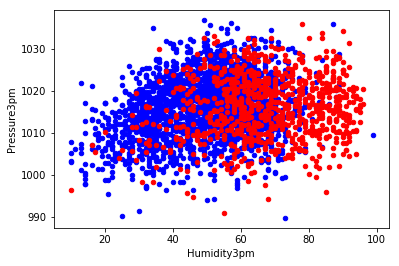

In [8]:
fig, ax = plt.subplots()
dataset[dataset['RainTomorrow'] == 'No'].plot.scatter(x='Humidity3pm', y='Pressure3pm', c='b', alpha=1, ax=ax)
dataset[dataset['RainTomorrow'] == 'Yes'].plot.scatter(x='Humidity3pm', y='Pressure3pm', c='r', alpha=1, ax=ax)


# K- Nearest Neighbor Classification

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
dataset_clean = dataset.dropna()
len(dataset), len(dataset_clean)

(3337, 3309)

In [11]:
X = dataset_clean[['Humidity3pm','Pressure3pm']]
Y = dataset_clean['RainTomorrow']
Y 

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
5       Yes
6       Yes
7       Yes
8       Yes
9        No
10       No
11      Yes
12      Yes
13       No
14       No
15       No
16       No
17       No
18       No
19       No
20       No
21       No
22       No
23       No
24       No
25      Yes
26      Yes
27      Yes
28       No
29      Yes
       ... 
3307     No
3308     No
3309     No
3310     No
3311     No
3312     No
3313     No
3314    Yes
3315     No
3316     No
3317    Yes
3318    Yes
3319    Yes
3320    Yes
3321    Yes
3322    Yes
3323     No
3324    Yes
3325     No
3326     No
3327     No
3328    Yes
3329     No
3330    Yes
3331     No
3332     No
3333     No
3334     No
3335     No
3336     No
Name: RainTomorrow, dtype: object

In [12]:
X = dataset_clean[['Humidity3pm','Pressure3pm']]
Y = dataset_clean['RainTomorrow']
Y = np.array ([ 0 if value == 'No' else 1 for value in Y])
Y

array([1, 1, 1, ..., 0, 0, 0])

# Train_Test_Split the model

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state =42)

In [15]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8091787439613527